## Notation polonaise inversée

## La notation polonaise

> source : wikipédia

---

---

<p>L'expression qui ajoute les nombres 1 et 2 s'écrit, en notation préfixée,  + 1 2. Dans les expressions préfixées, les <b>opérateurs</b> précèdent toujours leurs <b>opérandes</b> qui peuvent être eux-mêmes des <b>expressions</b> non-triviales. Par exemple, l'expression qui serait écrite en notation infixée classique&#160;:
</p>

`( 5 - 6 ) × 7`

<p>est écrite en notation préfixée&#160;:


`× ( - 5 6 ) 7`

<p>On notera que comme on connait l'<b>arité</b> des opérateurs, les parenthèses sont inutiles et l'expression précédente peut être simplifiée en&#160;:

`× - 5 6 7`

L'évaluation du produit × est activée quand ses deux opérandes ont été évaluées (à savoir, `5 − 6` et `7`). Plus généralement l'évaluation d'un opérateur d'arité $n$ est activée après que ses $n$ opérandes ont été évaluées.


pour évaluer cette expression on doit multipler `( - 5 6 )` et `7`

pour évaluer `- 5 6` on doit soustraire 6 de 5

L'expression `( 5 - 6 ) × 7` vaut donc $-7$.

---

---


## La notation polonaise inverse

La notation polonaise inverse (NPI) (en anglais RPN pour Reverse Polish Notation), également connue sous le nom de notation post-fixée, permet d'écrire de façon non ambiguë les formules arithmétiques sans utiliser de parenthèses. Dérivée de la notation polonaise présentée en 1924 par le mathématicien polonais Jan Łukasiewicz, elle s’en différencie par l’ordre des termes, **les opérandes y étant présentés avant les opérateurs et non l’inverse**.

Par exemple, l’expression $ 3 \times (4 + 7)$ peut s'écrire en NPI sous la forme :

`4 7 + 3 ×`, ou encore sous la forme `3  4  7 + ×`.

---

---

## Effectuer le calcul en utilisant une pile :

Schéma illustrant le déroulement du calcul de `4 7 + 3 ×` :

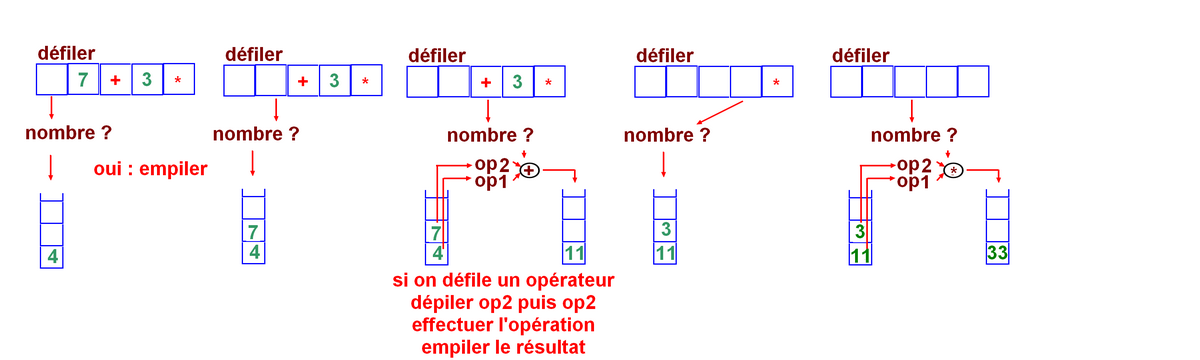

Schéma illustrant le déroulement du calcul de `3 4 7 + ×` :

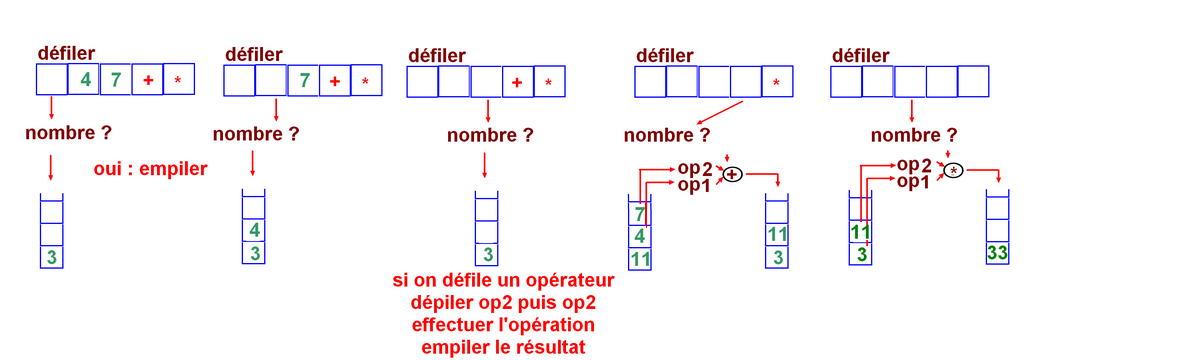

### Stocker/Évaluer l'expression dans une file et l'évaluer avec une Pile

Pour effectuer le calcul, on va utiliser la file `saisies` et la pile `opérande`.

La saisie de l'utilisateur est enfilée dans `saisies` (file).

Pour chaque symbole de la file : 

- si c'est un nombre, on l'empile dans `operandes`
- si c'est un opérateur,
  - on dépile 1 ou 2 éléments d'`operandes` (en fonction de l'arité de l'opérateur), 
  - on effectue l'opération, 
  - on empile le résultat au sommet de `operandes`.


Par exemple, voici les étapes permettant d'évaluer l'expression `2 3 + 4 ×` :

- la file `saisies` et la pile `operandes` sont initialisées : 

            saisies    : <<[2, 3, +, 4, *]<
            operandes  : <>[]X

> 

- `2` est défilé, c'est un nombre donc il est empilé dans la pile :

            saisies  : <<[3, +, 4, *]<
            operandes: <>[2]X

>

- `3` est défilé, c'est un nombre donc il est empilé dans la pile :

            saisies  : <<[+, 4, *]<
            operandes: <>[3, 2]X

>

- `+` est défilé, c'est un opérateur binaire (d'arité 2) donc :
  - on dépile 2 éléments de la pile `operandes` sur lesquels on appliqué l'opération *addition*,
  - le résultat de `2 + 3` est empilé dans `operandes` 

        saisies  : <<[4, *]<
        operandes: <>[5]X

>

- `4` est défilé, c'est un nombre donc il est empilé :

            saisies  : <<[*]<
            operandes: <>[4, 5]X

>

- `*` est défilé, c'est un opérateur binaire donc:
  - on dépile 2 éléments de la pile `operandes` sur lesquels on appliqué l'opération *produit*, 
  - le résultat de `4 × 5` est empilé dans `operandes` 

        saisies  : <<[]<
        operandes: <>[20]X

>

- la file est vide, le résultat de l'expression est au sommet de la pile :
  
           resultat: 20

### Sur feuille

Evaluez cette expression : `5 7 - 8 ÷ `

Initialement:

        saisies  : <<[5, 7, '-', 8, '/']<
        operandes: <>[]X

Étape 1:

        saisies  : <<[7, '-', 8, '/']<
        operandes: <>[5]X

Étape 2:

        saisies  : <<['-', 8, '/']<
        operandes: <>[7, 5]X

Étape 3 : (poursuivez)

## Implémenter la File


In [18]:
class Maillon:
    def __init__(self, valeur, suivant):
        self.valeur = valeur
        self.suivant = suivant


class File:
    def __init__(self) -> None:
        """ deux attributs initialisés à vide """
        self.tete  = None
        self.queue = None 


    def est_vide(self) -> bool:
        """ renvoie True si la File est vide, False sinon """
        return self.tete == None


    def enfiler(self, valeur) -> None:
        """ ajoute un maillon valeur en queue de File, ne renvoie rien """
        queue = Maillon(valeur, None)

        if self.est_vide():
            self.tete = queue
            self.queue = queue
        else:
            self.queue.suivant = queue
            self.queue = queue
    

    def defiler(self):
        """ retire un maillon en tête de la File, et renvoie sa valeur """
        if self.est_vide():
            raise IndexError("defiler sur file vide")
        
        valeur = self.tete.valeur
        self.tete = self.tete.suivant
        return valeur


    def __str__(self) :
        """
        Format d'affichage de la file.
        
        Exemple si on enfile 4, 3, +, 5 et * la file s'affichera :
        '<<[4, 3, +, 5, *[<'
            ^ tête      ^ queue de la file
        """
        texte = "<<["
        courant = self.tete
        while courant is not None:
            if len(texte) > 3:
                texte += ', '
            texte += str(courant.valeur)
            courant = courant.suivant        
        texte += "]<"
        return texte


## Utiliser la File

On souhaite crée la file contenant l'expression : `4 3 + 5 ×`

In [19]:
# écrire les instructions permettant de créer la file :
saisies = File()


# écrire les instructions permettant de remplir la file :
saisies.enfiler(4)
saisies.enfiler(3)
saisies.enfiler('+')
saisies.enfiler(5)
saisies.enfiler('*')


# afficher la file
print(saisies)


# défiler une fois et affichez la valeur défilée, puis affichez la file de nouveau
valeur = saisies.defiler()
print(valeur)
print(saisies)


<<[4, 3, +, 5, *]<
4
<<[3, +, 5, *]<


Si vous avez bien implémentez la file et vous avez bien effectuer les opération pour enfiler l'expression, puis  défiler le 4, vous devez obtenir ceci :


    <<[4, 3, +, 5, *]<
    4
    <<[3, +, 5, *]<

## Imlémenter la Pile


In [20]:
class Pile:
    def __init__(self) -> None:
        """ un seul attribut tete initialisé à None """
        self.tete = None


    def est_vide(self) -> bool:
        """ renvoie True si la pile est vide, False sinon """
        return self.tete is None


    def empiler(self, valeur) ->None:
        """ ajoute le maillon de valeur au sommet de la Pile, ne renvoie rien """
        sommet = Maillon(valeur, self.tete)
        self.tete = sommet


    def depiler(self):
        """ retire le maillon au sommet de la Pile et renvoie sa valeur """
        if self.est_vide():
            raise IndexError("depiler sur pile vide")
        val = self.tete.valeur
        self.tete = self.tete.suivant
        return val


    def __str__(self):
        """
        Format d'affichage de la pile.
        
        Exemple : si on empile successivement 4, 3, +, 5 et *, un print(ma_pile) affichera :
        <>[*, 5, +, 3, 4]X
        """
        texte = "<>["
        courant = self.tete
        while courant is not None:
            if len(texte) > 3:
                texte += ', '
            texte += str(courant.valeur)
            courant = courant.suivant        
        texte += "]X"
        return texte


## Utiliser la Pile

+ créez une pile vide
+ empile 2
+ empiler 3
+ affecter '-' à une variable opérateur
+ depiler et affecter la valeur à une variable operande2
+ depiler et affecter la valeur à une variable operande1
+ faire afficher **2 - 3** en utilisant la variable *opérateur* et les 2 opérandes

Attention à l'ordre, $2-3 \neq 3-2$

In [21]:
p = Pile()
p.empiler(2)
p.empiler(3)
operateur = '-'
operande2 = p.depiler()
operande1 = p.depiler()
print(operande1, operateur, operande2)


2 - 3


**ATTENTION** Pour le moment, l'ordre des opérateurs n'importe pas, car les opérateurs sont commutatifs : 

$2+3 = 3+2$ et de même $2 \times 3=3 \times 2$

Mais plus loin, nous utiliserons des opérateur non commutatifs., il est donc important de respecter l'ordre des opérandes.

## Fonction evaluer

Cette fonction prend en entrée une File, et renvoie le résultat.

Les operateurs admis sont uniquement '+' et '*'.


> Vous aurez besoin d'identifier la nature des éléments défilés.
> pour savoir si c'est un nombre : 
```python
fonction évaluer :
   tant que f non vide :
      defiler f -> a
      if type(a) in [int,float] :
         c'est un nombre ! -> empile
      else : //c'est un opérateur
         dépiler -> op2
         dépiler -> op1
         effectuer l'opération et empiler le résultat
   fin tant que
   depiler p et renvoyer le résultat
```


In [22]:
def evaluer(saisies:File):
    """
    Évalue l'expression arithmétique contenue dans la file saisie.
    
    Args:
        saisies (File): File non vide contenant une expression

    Returns:
        [T]: valeur de l'expression
    """
    operandes = Pile()
    while not saisies.est_vide():
        a = saisies.defiler()
        if type(a) in [int, float]:
            # c'est un nombre
            operandes.empiler(a)
        else:
            # c'est un opérateur
            op2 = operandes.depiler()
            op1 = operandes.depiler()
            if a == '+':
                resultat = op1 + op2
            elif a == '*':
                resultat = op1 * op2
            operandes.empiler(resultat)
    resultat = operandes.depiler()
    return resultat


## Evaluer une expression

+ créez une File contenant l'expression = [4, 3, '*', 5, '+']
+ utilisez la fonction evaluer() pour afficher le résultat


In [23]:
expression = [4, 3, '*', 5, '+']

# créez la file :
saisies = File()
saisies.enfiler(4)
saisies.enfiler(3)
saisies.enfiler('*')
saisies.enfiler(5)
saisies.enfiler('+')


# affiche la file
print(saisies)


# calcule (affectez dans une variable nommée résultat), puis afficher
resultat = evaluer(saisies)
print(resultat)


# teste le résultat
assert resultat == 17

<<[4, 3, *, 5, +]<
17


## Modifier la fonction evaluer

Cette fonction prend en entrée une File, et renvoie le résultat.

Nous souhaitons maintenant qu'elle prenne en paramètre une expression, donnée dans une liste python.

Ainsi on pourrait appeler :

```python
>>> evaluer( [4,3,'-',2,'+']) 
3
```




In [24]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    saisies = File()
    for x in expression:
        saisies.enfiler(x)

    operandes = Pile()
    while not saisies.est_vide():
        a = saisies.defiler()
        if type(a) in [int, float]:
            # c'est un nombre
            operandes.empiler(a)
        else:
            # c'est un opérateur
            op2 = operandes.depiler()
            op1 = operandes.depiler()
            if a == '+':
                resultat = op1 + op2
            elif a == '*':
                resultat = op1 * op2
            operandes.empiler(resultat)
    resultat = operandes.depiler()
    return resultat



In [25]:
# test
evaluer([4, 3, '*', 2, '+'])

14

## Une fonction exec_operation

Cette fonction prend en entrée 2 operandes et un operateur, et renvoie le résultat.

```python
>>> exec_operation( 4,3,'-') 
1
>>> exec_operation( 4,3,'+') 
7
```

Mais nous souhaitons plus tard ajouter d'autres opérateurs. La syntaxe :
```python
if operateur == '+' :
    ...
else :
    ...
```

n'est donc pas satisfaisante. Imaginez le code si on met un grand nombre d'opérateurs !

La moindre faute de frappe dans l'une des nombreuses lignes du code produira des erreurs, parfois délicates à diagnostiquer.

**Pour remédier à ce problème, nous allons créer un dictionnaire**

Les clés du dictionnaire sont les opérateurs : '+' et '*' pour le moment.
Les valeurs associées sont les expressions à effectuer.

par exemple, testez ce code :





In [26]:
operande2 = 3
operande1 = 2
operations = {'+':operande1 + operande2}
print(operations['+'])

5


## Une fonction exec_operation

Cette fonction prend en entrée 2 operandes et un operateur, et renvoie le résultat.

Inspirez vous du code exemple ci-dessus.
Les opérateurs reconnus seront + - * et /.





In [27]:
def exec_operation(op1,op2,operateur) :
    
    operations = {'+': op1 + op2, '*': op1 * op2, '-': op1 - op2, '/': op1 / op2}
    return operations[operateur]


# tests :
print(exec_operation(3,4,'*'))
print(exec_operation(3,4,'-'))
print(exec_operation(3,4,'+'))
print(exec_operation(3,4,'/'))

12
-1
7
0.75


## Modifier la fonction evaluer 

La partie traitement, quand on a défilé un opérateur, sera remplacée par l'appel de exec_operation()





In [28]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    saisies = File()
    for x in expression:
        saisies.enfiler(x)

    operandes = Pile()
    while not saisies.est_vide():
        a = saisies.defiler()
        if type(a) in [int, float]:
            # c'est un nombre
            operandes.empiler(a)
        else:
            # c'est un opérateur
            op2 = operandes.depiler()
            op1 = operandes.depiler()
            resultat = exec_operation(op1, op2, a)
            operandes.empiler(resultat)
    resultat = operandes.depiler()
    return resultat



# tests :
print(evaluer([3,4,'+']))
print(evaluer([3,4,'-',5,'*']))
print(evaluer([-3,-4,'-',5,'/']))

7
-5
0.2


## Ajouter des opérateurs

Le dictionnaire dans exec_operation(), n'a que 4 clés : + - * et /

Ajoutez les opérateurs de comparaisons : **== != <= < > et >=**

Et les opérateurs de division euclidienne : **% et //**





In [29]:
def exec_operation(op1,op2,operateur) :
    
    operations = {'+': op1 + op2, 
                  '*': op1 * op2, 
                  '-': op1 - op2, 
                  '/': op1 / op2,
                  '==': op1 == op2, 
                  '!=': op1 != op2, 
                  '<=': op1 <= op2, 
                  '<': op1 < op2, 
                  '>': op1 > op2, 
                  '>=': op1 >= op2, 
                  '%': op1 % op2, 
                  '//': op1 // op2}

    return operations[operateur]


# quelques tests :
print('3 != 4',exec_operation(3,4,'!='))
print('3 == 4',exec_operation(3,4,'=='))
print('3 > 4',exec_operation(3,4,'>'))
print('3 >= 4',exec_operation(3,4,'>='))
print('3 < 4',exec_operation(3,4,'<'))
print('3 <= 4',exec_operation(3,4,'<='))
print('13 % 4',exec_operation(13,4,'%'))
print('16 % 4',exec_operation(16,4,'%'))
print('3 // 4',exec_operation(3,4,'//'))



3 != 4 True
3 == 4 False
3 > 4 False
3 >= 4 False
3 < 4 True
3 <= 4 True
13 % 4 1
16 % 4 0
3 // 4 0


## Utiliser nos nouveaux opérateurs






In [30]:
expression = [4, 3, '+', 5, '*']
print('résultat :', [4, 3, '+', 5, '*'], "=", evaluer(expression))

expression = [4,3,'+',5,'*',10,'==']
print('résultat :', [4,3,'+',5,'*',10,'=='],"=",evaluer(expression))

expression = [4,3,'+',5,'*',10,'%']
print('résultat :', [4,3,'+',5,'*',10,'%'],"=",evaluer(expression))

expression = [4,3,'+',5,'*',10,'//']
print('résultat :', [4,3,'+',5,'*',10,'//'],"=",evaluer(expression))

résultat : [4, 3, '+', 5, '*'] = 35
résultat : [4, 3, '+', 5, '*', 10, '=='] = False
résultat : [4, 3, '+', 5, '*', 10, '%'] = 5
résultat : [4, 3, '+', 5, '*', 10, '//'] = 3


## Version récursive de la fonction evaluer 

On a modifié un peu le code pour séparer la création de la File, et son évaluation. On crée alors une pile vide et on appelle evaluer_file qui va faire le calcul.

La version de evaluer_file est impérative. Tansformez la en fonction récursive.





In [14]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    f = File()
    for elem in expression :
        f.enfile(elem)
    return evaluer_file(f,Pile())

def evaluer_file(f,p) :
    """
    :params expression: une file contenant une expression
    :returns : la valeur de l'expression 
    """

    while not f.est_vide() :
        a = f.defile()
        if type(a) in [int,float] :
            p.empile(a)
        else :
            op2 = p.depile()
            op1 = p.depile()
            p.empile(exec_operation(op1,op2,a))
            
    return p.depile()

# tests :
print(evaluer([3,4,'+']))
print(evaluer([3,4,'-',5,'*']))
print(evaluer([-3,-4,'-',5,'/']))

AttributeError: 'File' object has no attribute 'enfile'

## Calcul sans parenthèses

L'expression $4 \times (7+3)$ peut être écrite en NPI : $4\ (7\ 3\ +)\times$ mais également $4\ 7\ 3\ + \times$ 

Expliquez comment cette dernière expression est évaluée en représentant la file et la pile à chaque étape.



**Initialisation :**

f = Sortie <- [4,7,3,'+','*']

p = [] <- sommet

**Etape 1 :**

f = Sortie <- [7,3,'+','*']

p = [4] <- sommet

**Poursuivez... (sur feuille)**


In [ ]:
# vérifions :
print(evaluer([4,7,3,'+','*']))
# ou encore :
# ou encore :
print(evaluer([10,7,3,'+','==']))